# Airline analytics

The customer is a Russian airline operating domestic passenger air transportation.

The purpose of the project is to study the database and analyze the demand of passengers for flights to various cities of Russia, to find out the preferences of users buying tickets to certain destinations.

## Data Preparation and Exploration

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
planes_on_flights = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_05/query_1.csv')
planes_on_flights
planes_on_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


### Comment
This table contains information about 8 aircraft models and the number of flights for each of them made in September 2018. The data types correspond to the information contained in the table.

In [10]:
flights_in_city = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_05/query_3.csv')
flights_in_city
flights_in_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


### Summary
The table contains information about cities in Russia and the average number of flights arriving in them per day in August 2018.  The data types correspond to the information contained in the table.

## Exploratory Data Analysis

In [11]:
# Select 10 cities with the largest number of accepted flights in a separate table.
top_10_city = flights_in_city.sort_values(by='average_flights', ascending=False).head(10)
top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Text(0, 0.5, 'Aircraft model')

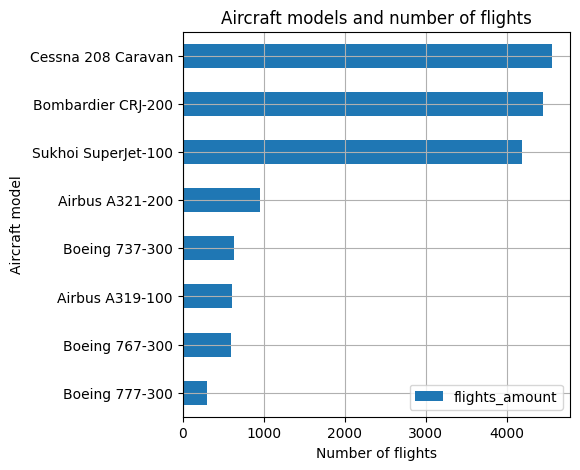

In [12]:
planes_on_flights.sort_values(
    by='flights_amount', ascending=True).plot.barh(
    x='model', y='flights_amount', grid = True, figsize = (5, 5))
plt.title('Aircraft models and number of flights')
plt.xlabel('Number of flights')
plt.ylabel('Aircraft model')

### Comment
Since we are considering data on domestic air transportation (even in the largest country in the world), short-haul, narrow-body aircraft models with a flight range of 1000 to 3000 km with a passenger capacity of up to 100 people have an absolute advantage:
1. Cessna 208 Caravan
2. Bombardier CRJ-200
3. Sukhoi SuperJet-100

It would be logical to assume that by spending less time on the flight, boarding and checking passengers, loading and unloading luggage, the listed aircraft models can make more flights than medium- and long-haul more passenger-carrying aircraft, which is confirmed by the schedule indicators.

Text(0, 0.5, 'City')

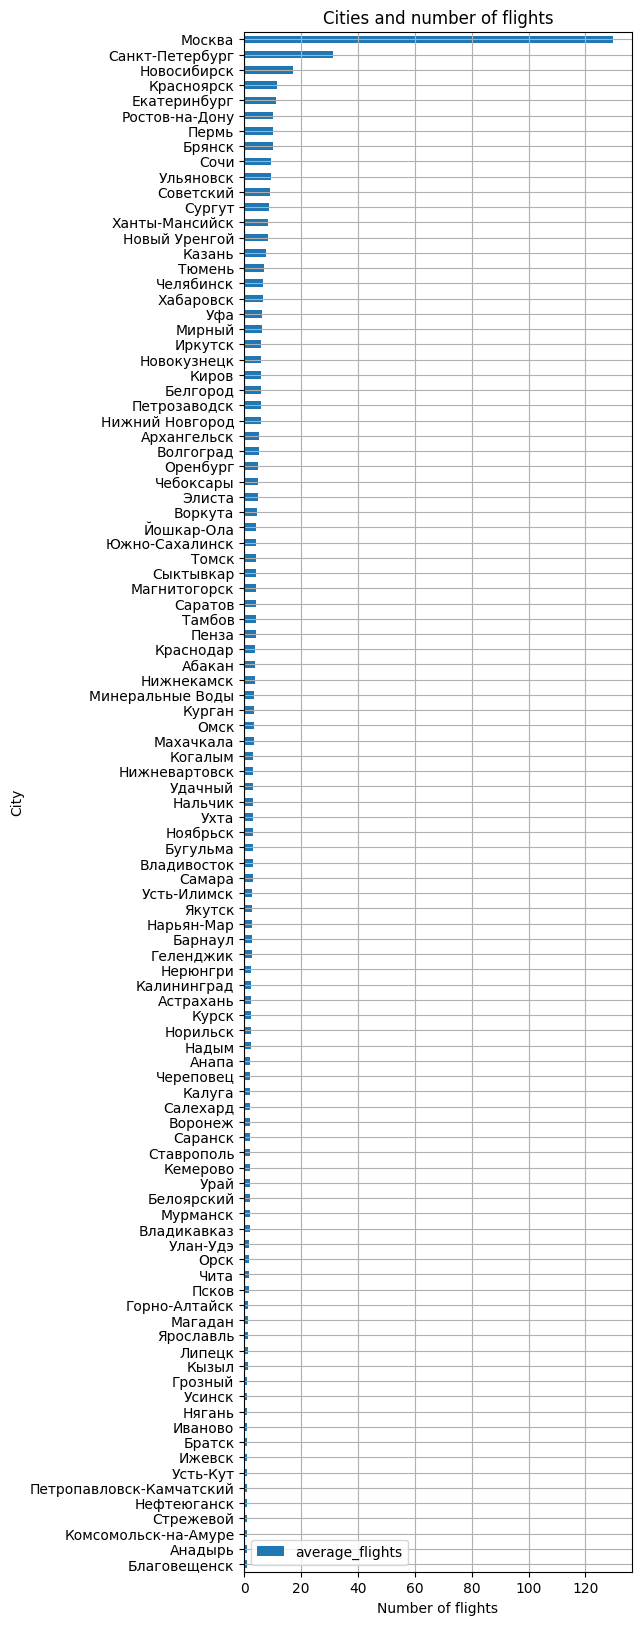

In [13]:
flights_in_city.sort_values(
    by='average_flights', ascending=True).plot.barh(
    x='city', y='average_flights', grid = True, figsize = (5, 20))
plt.title('Cities and number of flights')
plt.xlabel('Number of flights')
plt.ylabel('City')

### Comment
As one might have expected, Moscow, the absolute leader in the number of flights, accounts for almost a quarter of all flights from the presented table (23.4%). A large number of factors affect the number of flights in a particular city. Since we have a very small amount of information, the reasons for the distribution of cities on the graph can only be assumed based on logic, personal knowledge and experience. It can be assumed that the main factors affecting the number of flights are:

1. Quantity and quality characteristics of airports
2. Number of external flights
3. The population of the city and the development of its infrastructure

Text(0, 0.5, 'City')

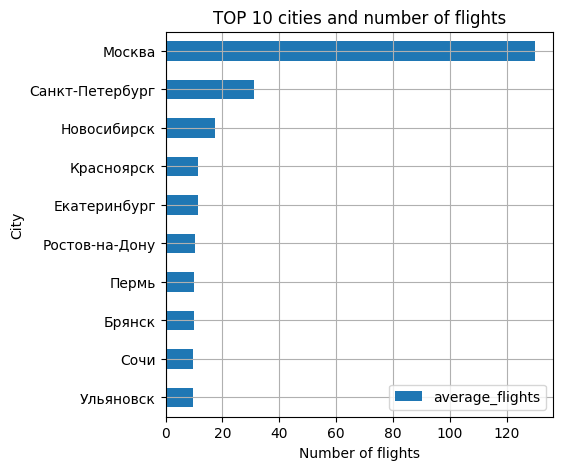

In [14]:
top_10_city.sort_values(
    by='average_flights', ascending=True).plot.barh(
    x='city', y='average_flights', grid = True, figsize = (5, 5))
plt.title('TOP 10 cities and number of flights')
plt.xlabel('Number of flights')
plt.ylabel('City')

### Summary
Considering in more detail the top 10 leaders in the number of flights, you can note that 7 of them are "million-plus" cities. The only exceptions here are Bryansk, Sochi and Ulyanovsk. Without additional data, we can only assume that flights to Bryansk are in demand because of its close location to the borders of two neighboring states. Since we took data for August 2018, Sochi's inclusion in the sample is quite understandable - the holiday season there will easily last until the end of September. Flights to Ulyanovsk may be justified by the presence of a large number of industrial enterprises in the region.

## General Conclusions and Recommendations

In this project, we had a very modest set of information available. For a more extensive analysis, we would really use the data freely available on the web, such as the technical characteristics of the presented aircraft models, airport characteristics, as well as data on the population and infrastructures of the cities under consideration.
However, the following conclusions can be drawn from the available data:

1. Holding festivals in cities practically does not correlate with the number of flights (which cannot be said about seasonality)
2. The leaders in the number of flights are small aircraft models that cover distances up to 3000 km (which does not indicate their profitability over more passenger-carrying vessels)
3. The cities leading in the number of flights are mostly densely populated, have more than one airport and are infrastructurally developed.